# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 90 # days

In [4]:
seed = 313

In [5]:
np.random.seed(seed)
scenario = {}

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [7]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
model = CovidModel()
logger().model = model
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

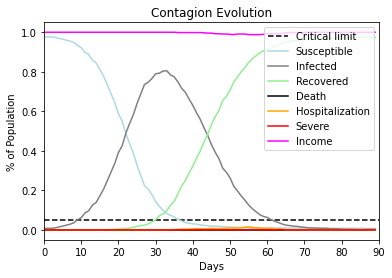

In [8]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [9]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[9336, 5899, 6062, 4486, 4150, 8173, 9729, 9783, 8358, 5492, 2591, 7128, 701, 9135, 9725, 8455, 8274, 2432, 1711, 2619, 4285, 9687, 6832, 6104, 297, 2237, 1662, 8954, 6099, 2861]
run with seed 9336:
run with seed 5899:
run with seed 6062:
run with seed 4486:
run with seed 4150:
run with seed 8173:
run with seed 9729:
run with seed 9783:
run with seed 8358:
run with seed 5492:
run with seed 2591:
run with seed 7128:
run with seed 701:
run with seed 9135:
run with seed 9725:
run with seed 8455:
run with seed 8274:
run with seed 2432:
run with seed 1711:
run with seed 2619:
run with seed 4285:
run with seed 9687:
run with seed 6832:
run with seed 6104:
run with seed 297:
run with seed 2237:
run with seed 1662:
run with seed 8954:
run with seed 6099:
run with seed 2861:
using average of time series:
stats on susceptible:
data: [0.16445776445776442, 0.21575555555555553, 0.2666333666333666, 0.5069666666666666, 0.2692777777777778, 0.21445555555

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 2

Complete lockdown

In [10]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)

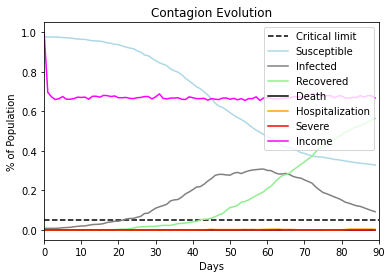

In [11]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [12]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[8449, 585, 1233, 7348, 3747, 6810, 4195, 6172, 4388, 8814, 7656, 3095, 1849, 5033, 5113, 2147, 1180, 3379, 8669, 3031, 2212, 9367, 5352, 3809, 3455, 4798, 6351, 1347, 4824, 4564]
run with seed 8449:
run with seed 585:
run with seed 1233:
run with seed 7348:
run with seed 3747:
run with seed 6810:
run with seed 4195:
run with seed 6172:
run with seed 4388:
run with seed 8814:
run with seed 7656:
run with seed 3095:
run with seed 1849:
run with seed 5033:
run with seed 5113:
run with seed 2147:
run with seed 1180:
run with seed 3379:
run with seed 8669:
run with seed 3031:
run with seed 2212:
run with seed 9367:
run with seed 5352:
run with seed 3809:
run with seed 3455:
run with seed 4798:
run with seed 6351:
run with seed 1347:
run with seed 4824:
run with seed 4564:
using average of time series:
stats on susceptible:
data: [0.8792762792762793, 0.8567111111111111, 0.7648388168826854, 0.5687555555555555, 0.9476555555555557, 0.68619999999

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [13]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,88
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)o
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

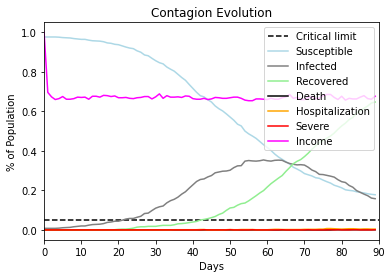

In [14]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [15]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[6600, 7539, 9679, 6189, 6919, 2770, 3283, 7741, 308, 3588, 2642, 5802, 4363, 5079, 9713, 703, 5973, 1947, 422, 7470, 7200, 4773, 8440, 5891, 9616, 3527, 6583, 7771, 3997, 8650]
run with seed 6600:
run with seed 7539:
run with seed 9679:
run with seed 6189:
run with seed 6919:
run with seed 2770:
run with seed 3283:
run with seed 7741:
run with seed 308:
run with seed 3588:
run with seed 2642:
run with seed 5802:
run with seed 4363:
run with seed 5079:
run with seed 9713:
run with seed 703:
run with seed 5973:
run with seed 1947:
run with seed 422:
run with seed 7470:
run with seed 7200:
run with seed 4773:
run with seed 8440:
run with seed 5891:
run with seed 9616:
run with seed 3527:
run with seed 6583:
run with seed 7771:
run with seed 3997:
run with seed 8650:
using average of time series:
stats on susceptible:
data: [0.6354333333333334, 0.3606444444444445, 0.6178333333333333, 0.6241444444444445, 0.5758555555555556, 0.586566666666666

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [16]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

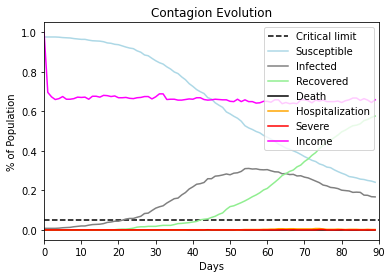

In [17]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [18]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[6375, 5289, 3655, 6889, 3676, 6809, 4527, 6962, 2481, 3093, 6652, 4276, 5419, 3401, 4058, 7748, 5311, 4698, 8969, 1709, 2248, 6814, 7990, 1457, 3342, 2659, 2261, 2867, 8561, 6729]
run with seed 6375:
run with seed 5289:
run with seed 3655:
run with seed 6889:
run with seed 3676:
run with seed 6809:
run with seed 4527:
run with seed 6962:
run with seed 2481:
run with seed 3093:
run with seed 6652:
run with seed 4276:
run with seed 5419:
run with seed 3401:
run with seed 4058:
run with seed 7748:
run with seed 5311:
run with seed 4698:
run with seed 8969:
run with seed 1709:
run with seed 2248:
run with seed 6814:
run with seed 7990:
run with seed 1457:
run with seed 3342:
run with seed 2659:
run with seed 2261:
run with seed 2867:
run with seed 8561:
run with seed 6729:
using average of time series:
stats on susceptible:
data: [0.4882444444444444, 0.6029888888888889, 0.6501555555555556, 0.40172222222222226, 0.4864666666666667, 0.75362222

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [19]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

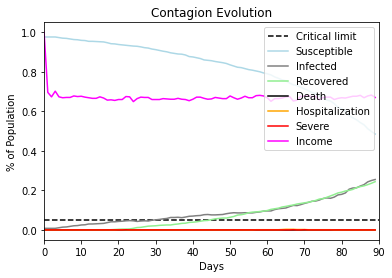

In [20]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [21]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[5947, 5531, 999, 865, 5925, 6092, 6640, 7301, 9982, 5335, 6, 3204, 1956, 5128, 9436, 2054, 2417, 790, 2686, 2844, 5150, 2991, 2639, 1448, 3095, 8772, 4837, 2819, 4740, 1375]
run with seed 5947:
run with seed 5531:
run with seed 999:
run with seed 865:
run with seed 5925:
run with seed 6092:
run with seed 6640:
run with seed 7301:
run with seed 9982:
run with seed 5335:
run with seed 6:
run with seed 3204:
run with seed 1956:
run with seed 5128:
run with seed 9436:
run with seed 2054:
run with seed 2417:
run with seed 790:
run with seed 2686:
run with seed 2844:
run with seed 5150:
run with seed 2991:
run with seed 2639:
run with seed 1448:
run with seed 3095:
run with seed 8772:
run with seed 4837:
run with seed 2819:
run with seed 4740:
run with seed 1375:
using average of time series:
stats on susceptible:
data: [0.5726, 0.6619444444444444, 0.6406038406038406, 0.519788888888889, 0.5067777777777778, 0.5342111111111112, 0.69584444444444

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [22]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

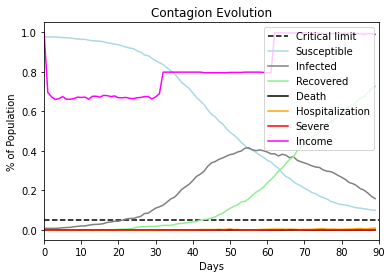

In [23]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [24]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[2421, 34, 7848, 1696, 8103, 7152, 3410, 2385, 7155, 7833, 1649, 7799, 8547, 1402, 9871, 8082, 2160, 9029, 6592, 9160, 2537, 2797, 3024, 9317, 2128, 6909, 1738, 4605, 9161, 7541]
run with seed 2421:
run with seed 34:
run with seed 7848:
run with seed 1696:
run with seed 8103:
run with seed 7152:
run with seed 3410:
run with seed 2385:
run with seed 7155:
run with seed 7833:
run with seed 1649:
run with seed 7799:
run with seed 8547:
run with seed 1402:
run with seed 9871:
run with seed 8082:
run with seed 2160:
run with seed 9029:
run with seed 6592:
run with seed 9160:
run with seed 2537:
run with seed 2797:
run with seed 3024:
run with seed 9317:
run with seed 2128:
run with seed 6909:
run with seed 1738:
run with seed 4605:
run with seed 9161:
run with seed 7541:
using average of time series:
stats on susceptible:
data: [0.7013084941228653, 0.616311111111111, 0.4740777777777778, 0.3964182745619872, 0.5213444444444444, 0.66412476412476

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [7]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

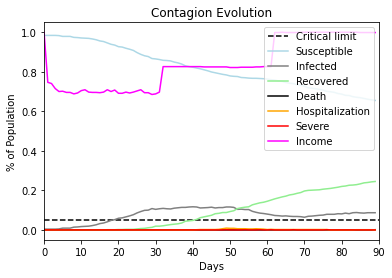

In [8]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [9]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[2360, 3604, 909, 8704, 8627, 7536, 1935, 2974, 8872, 2820, 9186, 2169, 7505, 3817, 7533, 9245, 5954, 212, 5203, 4994, 7471, 3239, 9727, 7411, 4556, 3165, 8515, 3002, 3151, 1487]
run with seed 2360:
run with seed 3604:
run with seed 909:
run with seed 8704:
run with seed 8627:
run with seed 7536:
run with seed 1935:
run with seed 2974:
run with seed 8872:
run with seed 2820:
run with seed 9186:
run with seed 2169:
run with seed 7505:
run with seed 3817:
run with seed 7533:
run with seed 9245:
run with seed 5954:
run with seed 212:
run with seed 5203:
run with seed 4994:
run with seed 7471:
run with seed 3239:
run with seed 9727:
run with seed 7411:
run with seed 4556:
run with seed 3165:
run with seed 8515:
run with seed 3002:
run with seed 3151:
run with seed 1487:
using average of time series:
stats on susceptible:
data: [0.36375846375846377, 0.49264444444444444, 0.7163555555555555, 0.4976555555555556, 0.5803666666666667, 0.74556554556

(<function dict.items>, <function dict.items>, <function dict.items>)